# Unsupervised Learning
#### BDA-2008 group
#### Togzhan Baydish
#### Aibolsyn Aibekqyzy
#### Dias Ali



## Assignment 4
### 1.Explore the dataset. Do the descriptive statistics. 

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sc
%matplotlib inline

In [55]:
transactions = pd.read_csv('transactions.csv', sep = ";")
codes = pd.read_csv('codes.csv', sep = ";")
types = pd.read_csv('types.csv', sep = ";")
train = pd.read_csv('train_set.csv', sep=";")

In [56]:
data = transactions.merge(codes,on='code',how='left')
data = data.merge(types,on='type',how='left')
data

,client_id,datetime,code,type,sum,code_description,type_description
0,96372458,421 06:33:15,6011,2010,-561478.94,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ
1,24567813,377 17:20:40,6011,7010,67377.47,Финансовые институты — снятие наличности автом...,Взнос наличных через АТМ (в своем тер.банке)
2,21717441,55 13:38:47,6011,2010,-44918.32,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ
3,14331004,263 12:57:08,6011,2010,-3368873.66,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ
4,85302434,151 10:34:12,4814,1030,-3368.87,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы
...,...,...,...,...,...,...,...
130034,15836839,147 11:50:53,5411,1010,-26344.59,"Бакалейные магазины, супермаркеты",Покупка. POS
130035,28369355,305 11:59:34,4829,2330,-24705.07,Денежные переводы,Списание с карты по операции “перевода с карты...
130036,40949707,398 21:13:58,5411,1110,-40353.72,"Бакалейные магазины, супермаркеты",Покупка. POS
130037,7174462,409 13:58:14,5411,1010,-25536.06,"Бакалейные магазины, супермаркеты",Покупка. POS


In [57]:
data = transactions.set_index("client_id").join(train.set_index("client_id")).reset_index().dropna()
data.head()

,client_id,datetime,code,type,sum,target
0,22899,231 09:31:53,6011,2110,-6737.75,1.0
1,22899,349 16:34:52,6011,4010,-8759.07,1.0
2,22899,441 15:36:37,6011,4010,-8759.07,1.0
3,22899,167 09:50:12,4814,1030,-1122.96,1.0
4,22899,221 18:54:19,5399,1110,-4626.59,1.0


In [8]:
data.shape

(130039, 7)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130039 entries, 0 to 130038
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         130039 non-null  int64  
 1   datetime          130039 non-null  object 
 2   code              130039 non-null  int64  
 3   type              130039 non-null  int64  
 4   sum               130039 non-null  float64
 5   code_description  130039 non-null  object 
 6   type_description  129998 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 7.9+ MB


In [10]:
data.isnull().sum()

client_id            0
datetime             0
code                 0
type                 0
sum                  0
code_description     0
type_description    41
dtype: int64

In [11]:
data.dropna().describe()

,client_id,code,type,sum
count,1.299980e+05,129998.000000,129998.000000,1.299980e+05
mean,5.086822e+07,5594.498362,2489.243111,-1.807807e+04
std,2.872856e+07,606.137322,2253.603327,5.585109e+05
min,2.289900e+04,742.000000,1000.000000,-4.150030e+07
25%,2.577174e+07,5211.000000,1030.000000,-2.243670e+04
50%,5.235837e+07,5641.000000,1110.000000,-5.502490e+03
75%,7.506302e+07,6010.000000,2370.000000,-1.122960e+03
max,9.999968e+07,9402.000000,8145.000000,6.737747e+07


In [12]:
data.dropna(how="any", inplace=True)

In [13]:
data.shape

(129998, 7)

In [14]:
data.describe()

,client_id,code,type,sum
count,1.299980e+05,129998.000000,129998.000000,1.299980e+05
mean,5.086822e+07,5594.498362,2489.243111,-1.807807e+04
std,2.872856e+07,606.137322,2253.603327,5.585109e+05
min,2.289900e+04,742.000000,1000.000000,-4.150030e+07
25%,2.577174e+07,5211.000000,1030.000000,-2.243670e+04
50%,5.235837e+07,5641.000000,1110.000000,-5.502490e+03
75%,7.506302e+07,6010.000000,2370.000000,-1.122960e+03
max,9.999968e+07,9402.000000,8145.000000,6.737747e+07


In [15]:
# to get dataset of only numbers
data_num = data.select_dtypes(include = ['float64', 'int64'])
data_num.head()

,client_id,code,type,sum
0,96372458,6011,2010,-561478.94
1,24567813,6011,7010,67377.47
2,21717441,6011,2010,-44918.32
3,14331004,6011,2010,-3368873.66
4,85302434,4814,1030,-3368.87


In [ ]:
data.code_description.value_counts()

Финансовые институты — снятие наличности автоматически            27917
Финансовые институты — снятие наличности вручную                  18684
Звонки с использованием телефонов, считывающих магнитную ленту    18641
Бакалейные магазины, супермаркеты                                 18490
Денежные переводы                                                 11423
                                                                  ...  
Продажа музыкальных инструментов, фортепиано, нот                     1
Ремонт бытовой техники, ремонт электроприборы                         1
Агенты и менеджеры по аренде недвижимости                             1
Нефть и нефтепродукты                                                 1
Разнообразные издательства/печатное дело                              1
Name: code_description, Length: 175, dtype: int64

In [16]:
data.type_description.value_counts()

Покупка. POS                                                                                             48450
Выдача наличных в АТМ                                                                                    20204
Оплата услуги. Банкоматы                                                                                 18368
Перевод на карту (с карты) через Мобильный банк (без взимания комиссии с отправителя)                    12915
Списание с карты на карту по операции <перевода с карты на карту> через Мобильный банк (без комиссии)     6848
Взнос наличных через АТМ (в своем тер.банке)                                                              4989
Перевод на карту (с карты) через АТМ (в пределах одного тер.банка)                                        2860
Покупка.                                                                                                  2233
Покупка. Зарубеж.                                                                                         1797
П

In [17]:
#Get Most Frequent value for all columns
from pandas.api.types import is_categorical_dtype

for col in data.columns:
    print(col, end=' - \n')
    print('_' * 50)
    if col in ['Type description'] or is_categorical_dtype(col):
        display(pd.DataFrame(data[col].astype('str').value_counts().sort_values(ascending=False).head(3)))
    else:
        display(pd.DataFrame(data[col].value_counts().sort_values(ascending=False).head(5)))

client_id - 
__________________________________________________


,client_id
70780820,2777
25270793,508
87252636,497
11701078,470
76043922,463


datetime - 
__________________________________________________


,datetime
456 00:00:00,60
169 00:00:00,53
120 00:00:00,53
393 00:00:00,52
325 00:00:00,52


code - 
__________________________________________________


,code
6011,27917
6010,18684
4814,18641
5411,18490
4829,11423


type - 
__________________________________________________


,type
1010,30802
2010,20204
1030,18368
1110,17648
7070,12915


sum - 
__________________________________________________


,sum
-2245.92,7487
-11229.58,3776
-1122.96,3769
-22459.16,3678
-4491.83,3441


code_description - 
__________________________________________________


,code_description
Финансовые институты — снятие наличности автоматически,27917
Финансовые институты — снятие наличности вручную,18684
"Звонки с использованием телефонов, считывающих магнитную ленту",18641
"Бакалейные магазины, супермаркеты",18490
Денежные переводы,11423


type_description - 
__________________________________________________


,type_description
Покупка. POS,48450
Выдача наличных в АТМ,20204
Оплата услуги. Банкоматы,18368
Перевод на карту (с карты) через Мобильный банк (без взимания комиссии с отправителя),12915
Списание с карты на карту по операции <перевода с карты на карту> через Мобильный банк (без комиссии),6848


In [18]:
n = 10
type_desc = data['type_description'].value_counts().index.tolist()[:n]
type_desc

['Покупка. POS ',
 'Выдача наличных в АТМ',
 'Оплата услуги. Банкоматы',
 'Перевод на карту (с карты) через Мобильный банк (без взимания комиссии с отправителя)',
 'Списание с карты на карту по операции <перевода с карты на карту> через Мобильный банк (без комиссии)',
 'Взнос наличных через АТМ (в своем тер.банке)',
 'Перевод на карту (с карты) через АТМ (в пределах одного тер.банка)',
 'Покупка.',
 'Покупка. Зарубеж. ',
 'Перевод на карту (с карты) через Мобильный банк (с взиманием комиссии с отправителя)']

## 2.Explanatory data analysis. Exploring the features, visualizations etc.

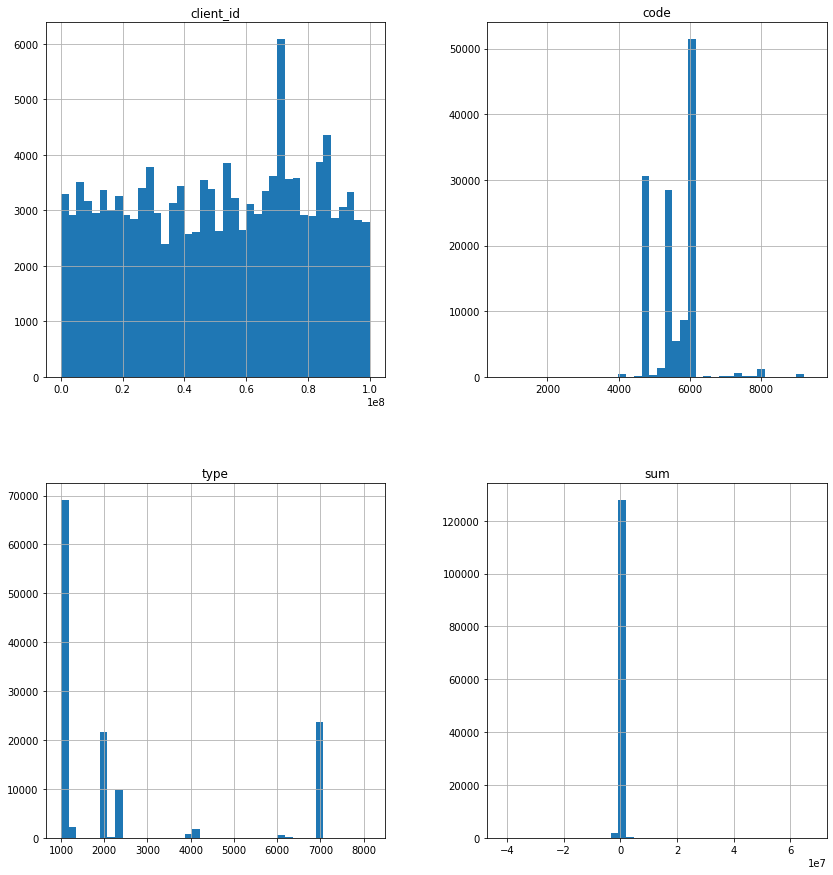

In [19]:
data_num.hist(figsize=(14, 15), bins=40); 

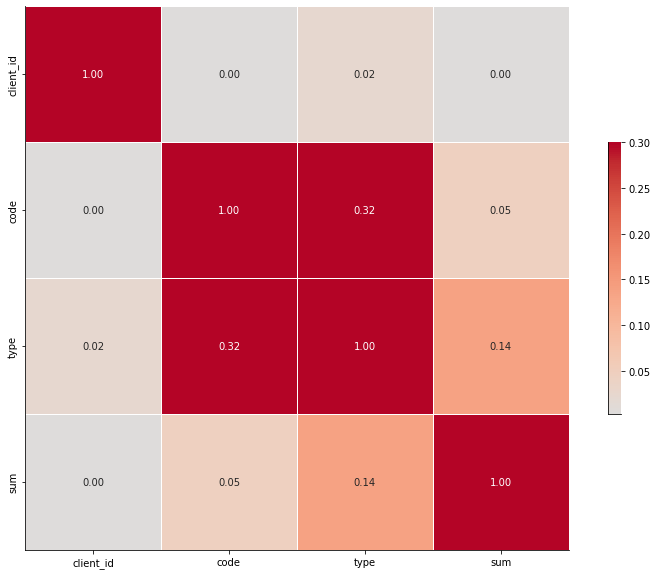

In [20]:
corr = data.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)

plt.show()

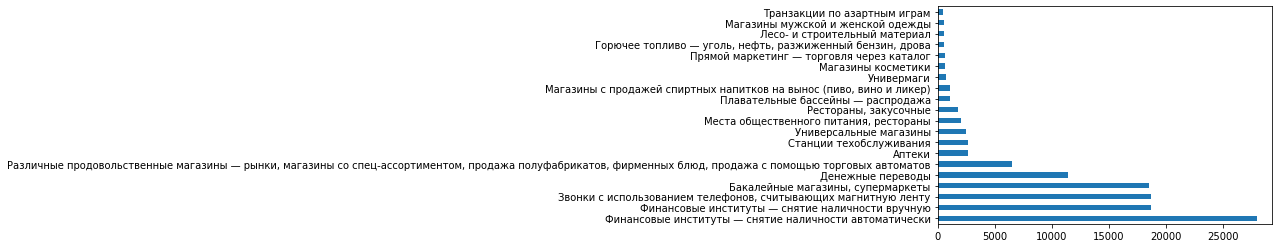

In [21]:

data['code_description'].value_counts()[:20].plot(kind='barh')

plt.show()

In [22]:
data['days'] = data.datetime.str[:-9]
data

,client_id,datetime,code,type,sum,code_description,type_description,days
0,96372458,421 06:33:15,6011,2010,-561478.94,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ,421
1,24567813,377 17:20:40,6011,7010,67377.47,Финансовые институты — снятие наличности автом...,Взнос наличных через АТМ (в своем тер.банке),377
2,21717441,55 13:38:47,6011,2010,-44918.32,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ,55
3,14331004,263 12:57:08,6011,2010,-3368873.66,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ,263
4,85302434,151 10:34:12,4814,1030,-3368.87,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы,151
...,...,...,...,...,...,...,...,...
130034,15836839,147 11:50:53,5411,1010,-26344.59,"Бакалейные магазины, супермаркеты",Покупка. POS,147
130035,28369355,305 11:59:34,4829,2330,-24705.07,Денежные переводы,Списание с карты по операции “перевода с карты...,305
130036,40949707,398 21:13:58,5411,1110,-40353.72,"Бакалейные магазины, супермаркеты",Покупка. POS,398
130037,7174462,409 13:58:14,5411,1010,-25536.06,"Бакалейные магазины, супермаркеты",Покупка. POS,409


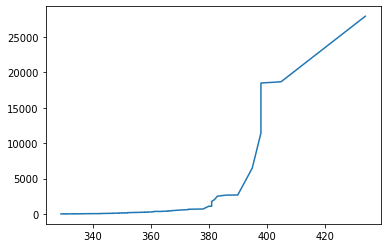

In [23]:
x = data['days'].value_counts()[:100]
y = data['code'].value_counts()[:100]
plt.plot(x,y)
plt.show()


In [24]:
z = data[data['sum']<0]
print(z)

        client_id      datetime  code  type         sum  \
0        96372458  421 06:33:15  6011  2010  -561478.94   
2        21717441   55 13:38:47  6011  2010   -44918.32   
3        14331004  263 12:57:08  6011  2010 -3368873.66   
4        85302434  151 10:34:12  4814  1030    -3368.87   
5        31421357  398 00:00:00  5411  1110    -1572.14   
...           ...           ...   ...   ...         ...   
130034   15836839  147 11:50:53  5411  1010   -26344.59   
130035   28369355  305 11:59:34  4829  2330   -24705.07   
130036   40949707  398 21:13:58  5411  1110   -40353.72   
130037    7174462  409 13:58:14  5411  1010   -25536.06   
130038   92197764  319 00:00:00  5533  1110   -12127.95   

                                         code_description  \
0       Финансовые институты — снятие наличности автом...   
2       Финансовые институты — снятие наличности автом...   
3       Финансовые институты — снятие наличности автом...   
4       Звонки с использованием телефонов, счит

In [25]:
z.shape[0]

105687

In [26]:
y = data[data['sum']>0]
print(y)

        client_id      datetime  code  type        sum  \
1        24567813  377 17:20:40  6011  7010   67377.47   
6        84826852  423 15:27:55  6010  7070    5654.99   
12       70780820  376 02:35:38  6010  7070    4693.96   
13        5009599  165 21:14:11  6010  7070   11678.76   
14       29041434  335 11:33:49  6010  7030    7276.77   
...           ...           ...   ...   ...        ...   
130011   82763536  102 00:00:00  5964  6200    5904.29   
130023   68955791  410 19:21:00  6010  7070    8983.66   
130024   57224158  347 14:26:19  6010  7070    8534.48   
130028   14837954  381 11:50:57  6011  7010  134754.95   
130033   57224158  380 13:52:15  6010  7030    7186.93   

                                         code_description  \
1       Финансовые институты — снятие наличности автом...   
6        Финансовые институты — снятие наличности вручную   
12       Финансовые институты — снятие наличности вручную   
13       Финансовые институты — снятие наличности вручную  

In [27]:
y.shape[0]

24311

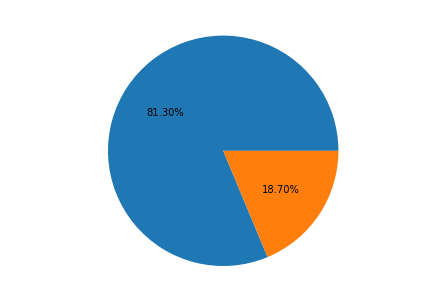

In [28]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
gender = [z.shape[0],y.shape[0]]
count_gender = [z.shape[0],y.shape[0]]
ax.pie(count_gender,autopct='%1.2f%%')
plt.show()

### Feature Scaling

In [29]:
y = data['sum']
print(y)

x = data.drop('sum', axis=1)
x.head()

0         -561478.94
1           67377.47
2          -44918.32
3        -3368873.66
4           -3368.87
             ...    
130034     -26344.59
130035     -24705.07
130036     -40353.72
130037     -25536.06
130038     -12127.95
Name: sum, Length: 129998, dtype: float64


,client_id,datetime,code,type,code_description,type_description,days
0,96372458,421 06:33:15,6011,2010,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ,421
1,24567813,377 17:20:40,6011,7010,Финансовые институты — снятие наличности автом...,Взнос наличных через АТМ (в своем тер.банке),377
2,21717441,55 13:38:47,6011,2010,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ,55
3,14331004,263 12:57:08,6011,2010,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ,263
4,85302434,151 10:34:12,4814,1030,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы,151


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

x = x.apply(LabelEncoder().fit_transform)



x_train,x_test,y_train,y_test=train_test_split(x,y)

print(y)



0         -561478.94
1           67377.47
2          -44918.32
3        -3368873.66
4           -3368.87
             ...    
130034     -26344.59
130035     -24705.07
130036     -40353.72
130037     -25536.06
130038     -12127.95
Name: sum, Length: 129998, dtype: float64


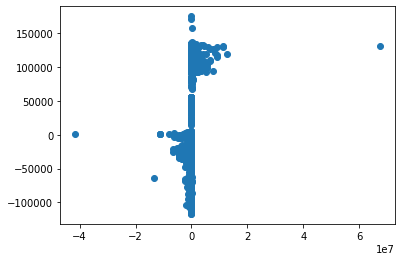

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

model = LinearRegression()
ss = StandardScaler()



model.fit(x_train, y_train)



y_train_pred=model.predict(x_test)
plt.scatter(y_test, y_train_pred)


In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sc = LabelEncoder()

x_train_std=ss.fit_transform(x_train)
x_test_std=ss.fit_transform(x_test)

### Model Building


#### K-means

target
0.0    46715
1.0    45111
Name: counts, dtype: int64


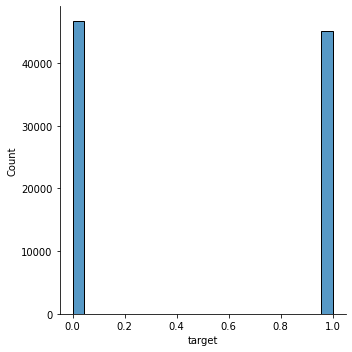

In [58]:
print(data.groupby("target").count().rename(columns={"client_id": "counts"}).counts)
sns.displot(data["target"])

In [60]:
x[["day", "time"]] = x["datetime"].str.split(' ', 0, expand=True)
x[["hours", "minute", "seconds"]] = x["time"].str.split(':', 0, expand=True)
x.day = x.day.astype(int)
x.hours = x.hours.astype(int)
x.minute = x.minute.astype(int)
x.seconds = x.seconds.astype(int)
x.target = x.target.astype(int)
x["weekday"] = x.day % 7
x = x.drop(columns=["datetime", "time"])
print(x.dtypes)
x.head()

client_id      int64
code           int64
type           int64
sum          float64
target         int64
day            int64
hours          int64
minute         int64
seconds        int64
weekday        int64
dtype: object


,client_id,code,type,sum,target,day,hours,minute,seconds,weekday
0,22899,6011,2110,-6737.75,1,231,9,31,53,0
1,22899,6011,4010,-8759.07,1,349,16,34,52,6
2,22899,6011,4010,-8759.07,1,441,15,36,37,0
3,22899,4814,1030,-1122.96,1,167,9,50,12,6
4,22899,5399,1110,-4626.59,1,221,18,54,19,4


In [68]:
X = data.drop(columns=["hours","minute","seconds","day","target","client_id"])
X.head(5)

,code,type,sum,weekday
0,6011,2110,-6737.75,0
1,6011,4010,-8759.07,6
2,6011,4010,-8759.07,0
3,4814,1030,-1122.96,6
4,5399,1110,-4626.59,4


[Text(0.5, 1.0, 'finding the K-Means')]

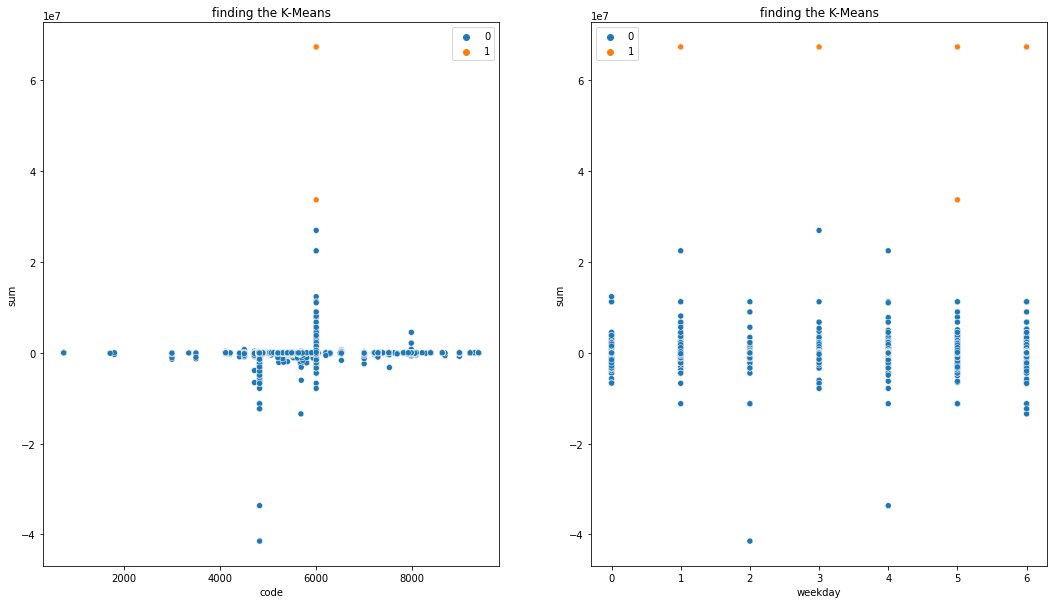

In [87]:
# finding a k-means when 2 clusters
figure, axes = plt.subplots(1, 2)
figure.set_size_inches(18, 10)
kmeans = KMeans(n_clusters = 2, random_state = 0).fit(X)
sns.scatterplot(x=X['code'], y=X['sum'], hue=kmeans.labels_, ax=axes[0]).set(title='finding the K-Means')
sns.scatterplot(x=X['weekday'], y=X['sum'], hue=kmeans.labels_, ax=axes[1]).set(title='finding the K-Means')

[Text(0.5, 1.0, 'Hierarchical clustering')]

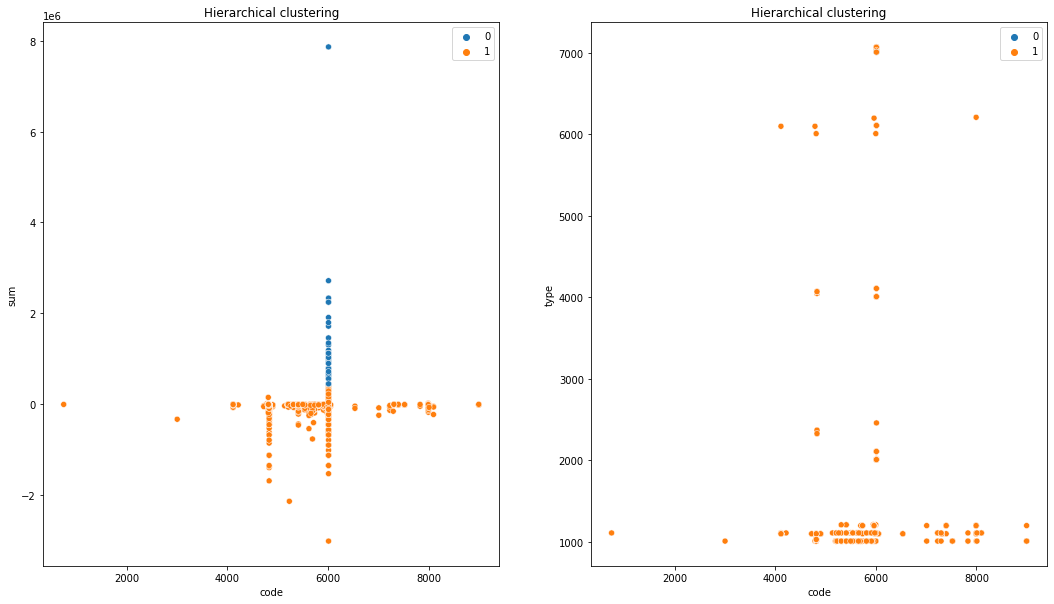

In [88]:
from sklearn.cluster import AgglomerativeClustering

X_head = X.head(2500)
cluster = AgglomerativeClustering().fit(X_head)
figure, axes = plt.subplots(1, 2)
figure.set_size_inches(18, 10)

sns.scatterplot(x=X_head['code'], y=X_head['sum'], hue=cluster.labels_, ax=axes[0]).set(title='Hierarchical clustering')
sns.scatterplot(x=X_head['code'], y=X_head['type'], hue=cluster.labels_, ax=axes[1]).set(title='Hierarchical clustering')

[Text(0.5, 1.0, 'finding the K-Means')]

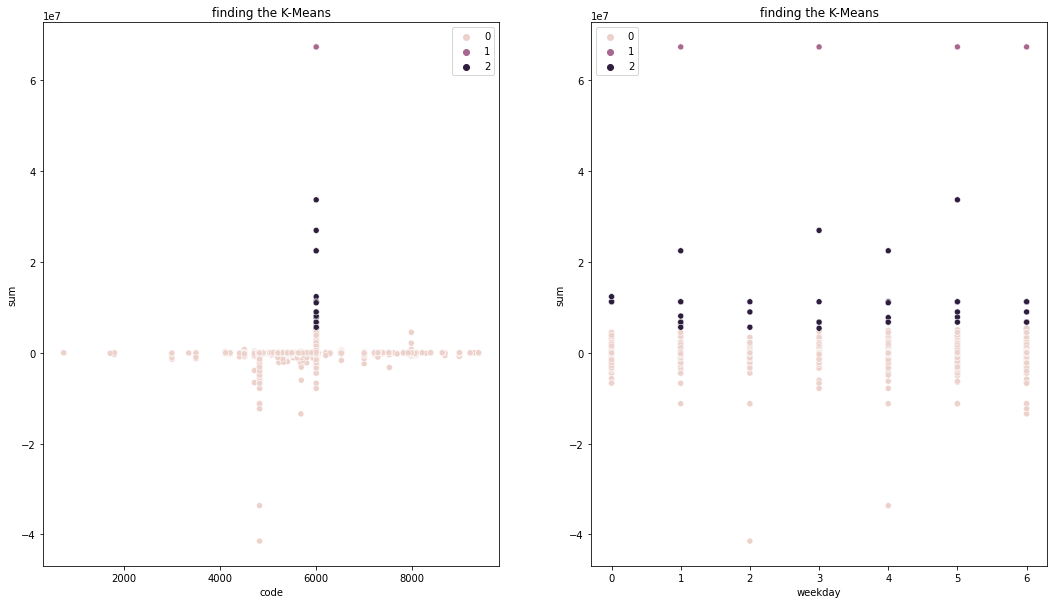

In [89]:
# finding a k-means when 3 clusters
figure, axes = plt.subplots(1, 2)
figure.set_size_inches(18, 10)
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(X)
sns.scatterplot(x=X['code'], y=X['sum'], hue=kmeans.labels_, ax=axes[0]).set(title='finding the K-Means')
sns.scatterplot(x=X['weekday'], y=X['sum'], hue=kmeans.labels_, ax=axes[1]).set(title='finding the K-Means')

In [99]:
from scipy.cluster.hierarchy import dendrogram, linkage

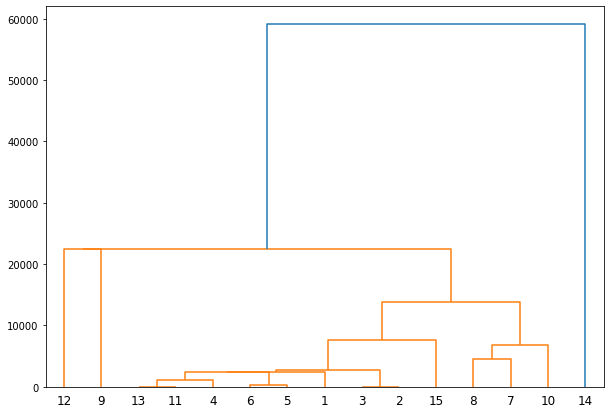

In [105]:
linked = linkage(X_head.head(15))

labelList = range(1, 16)

plt.figure(figsize=(10, 7))
figure.suptitle('Dendogramma')

dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ea0319bf-0aef-469e-b95f-2cb83f0ca96f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>